# A FICO problem

Fico is the industry standard for determining credit worthiness. However, research shows that FICO is overused. FICO's usage fits the idiom "square peg in a round hole".

Evidence:

* A [research study](https://www.stlouisfed.org/publications/regional-economist/october-2008/did-credit-scores-predict-the-subprime-crisis) by the Federal Reserve Bank of St. Louis demonstrates that __FICO scores were a poor indicater of the subprime mortgage crisis__.
> Given the nature of FICO scores, one might expect to find a relationship between borrowers’ scores and the incidence of default and foreclosure.....FICO scores have not indicated that relationship....higher FICO scores have been associated with bigger increases in default rates over time.
* [Studies prove](https://www.marketwatch.com/story/your-digital-footprint-could-provide-a-more-accurate-credit-score-2018-05-03) that __digital footprints can outperform FICO__.
> Those who order from mobile phones are three times as likely to default as those who order from desktops. A customer who uses her name in her email address is 30 percent less likely to default than one who doesn’t. Those who shop between noon and 6 p.m. are half as likely to default as midnight to 6 a.m. buyers
* FICO depends on credit usage (CU). __CU is unreliable__ because it fluctuates through economic cycles. [CU amongs millenials dropped](http://fortune.com/2018/02/27/why-millennials-are-ditching-credit-cards/), especially during the 2008 recession. But being debt conscious is financially desirable.
* Paying timely minimums on credit statements results in both a strong score and __mounting debt__.
* Credit utilization ratios factor heavily into FICO ( $util = \frac{debt}{availCredt}$ ). A healthy utilization is < 0.3. Credit card sneak companies sneakily encourage opening several credit lines to improve this ratio. There is a conflict of interest, because __they profit on credit debt__.

# An ML solution to credit defaults

30,000 instances of credit default data were collected by the University of California Irvine. We will predict credit defaults by training a variety of machine learning models using this data set.

### Data Cleansing and Exploration

In [130]:
import pandas as pd
fname = './UCI_Credit_Card.csv'

pd.set_option('display.max_columns', None)
pd.option_context('mode.use_inf_as_null', True)

df = pd.read_csv(fname)
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19437,19438,200000.0,2,1,2,30,0,0,0,0,0,0,148646.0,132606.0,136183.0,127438.0,124816.0,92037.0,5000.0,8500.0,3500.0,3000.0,25000.0,70000.0,0
5768,5769,320000.0,1,1,3,32,-1,-1,-1,-1,-1,-1,802.0,4929.0,2064.0,4365.0,1183.0,3287.0,4929.0,2064.0,4365.0,1183.0,3287.0,2810.0,0
27147,27148,340000.0,1,1,2,38,-1,-1,-2,-2,-2,-2,9054.0,1868.0,1135.0,0.0,0.0,0.0,1868.0,1144.0,0.0,0.0,0.0,0.0,0
19717,19718,280000.0,2,3,2,35,0,0,-1,0,0,0,5716.0,0.0,105082.0,105908.0,98380.0,93649.0,0.0,105082.0,4172.0,3408.0,3489.0,5295.0,0
26251,26252,280000.0,2,1,1,45,-2,-2,-2,-2,-2,-2,26573.0,17597.0,22284.0,20232.0,17567.0,20027.0,18388.0,22302.0,20274.0,17567.0,20027.0,17025.0,0
16826,16827,20000.0,1,2,1,40,0,0,0,2,0,0,12129.0,12919.0,14810.0,15267.0,15714.0,16308.0,1300.0,2100.0,1000.0,1000.0,1000.0,1000.0,1
998,999,50000.0,2,2,2,23,-1,-1,-1,0,-1,-1,780.0,0.0,780.0,390.0,390.0,500.0,0.0,780.0,0.0,390.0,500.0,18300.0,1
3886,3887,70000.0,1,2,2,41,0,0,0,0,0,0,69866.0,63679.0,54762.0,38750.0,39924.0,37757.0,10000.0,5090.0,2000.0,2000.0,4000.0,2000.0,0
12703,12704,50000.0,2,2,2,22,3,2,0,0,0,0,50953.0,49363.0,49243.0,46382.0,47261.0,48219.0,8.0,3011.0,1264.0,2000.0,1159.0,1244.0,1
12943,12944,70000.0,2,2,2,30,0,0,0,0,0,0,19758.0,8960.0,9949.0,10298.0,10511.0,9764.0,1162.0,1151.0,500.0,513.0,424.0,195.0,0


In [131]:
print('Rows of data: ', df.shape[0])
print('Columns of data: ', df.shape[1])

Rows of data:  30000
Columns of data:  25


In [132]:
labels = df['default.payment.next.month']
df = df.drop(['default.payment.next.month', 'ID'], axis=1)

In [133]:
for i in range(1,7):
    payment_key = 'PAY_AMT'+str(i)
    bill_key = 'BILL_AMT'+str(i)
    frac_paid = df[payment_key]/df[bill_key]
    df['fraction_paid_'+str(i)] = frac_paid
    df = df.drop([bill_key, payment_key], axis=1)
    
with pd.option_context('mode.use_inf_as_null', True):
    df = df.fillna(1)

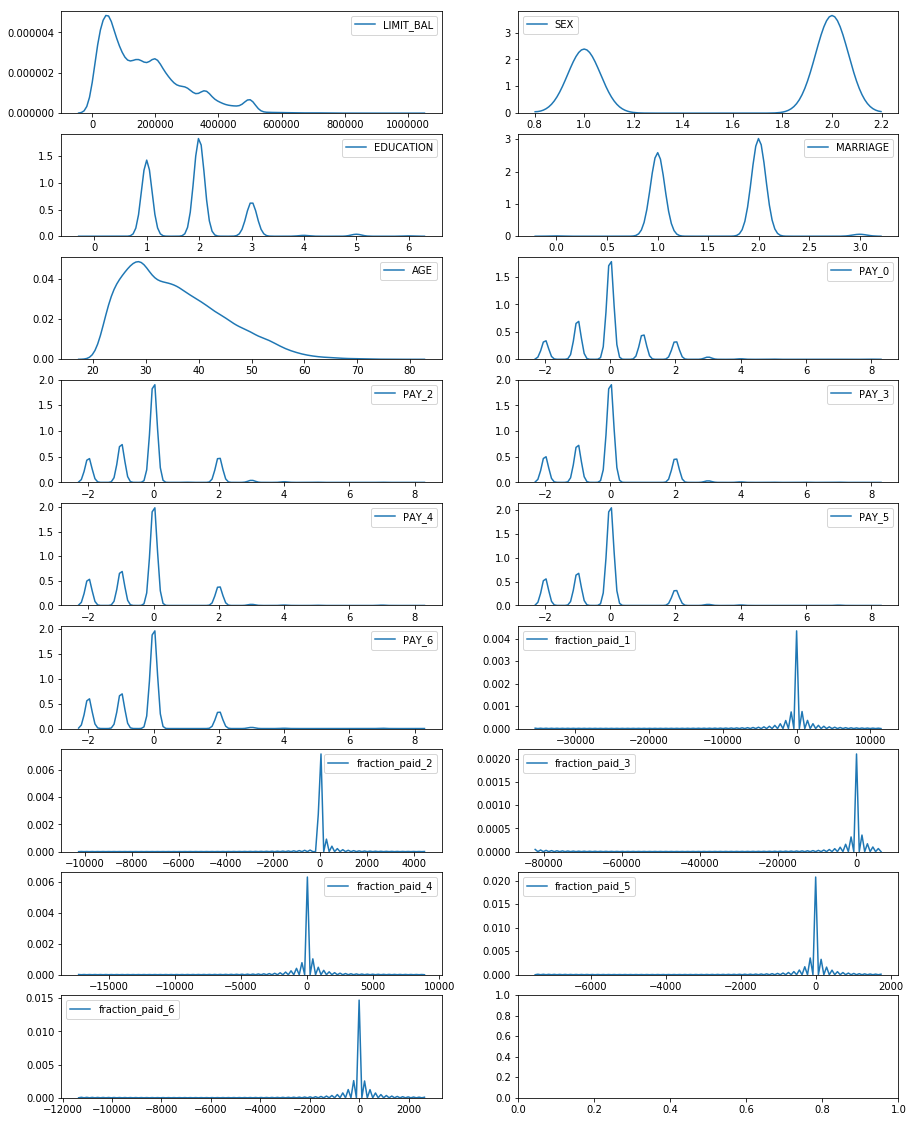

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

ncols = 2
nrows = math.ceil(len(df.columns)/2)

chart, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))

for i, key in enumerate(df.columns):
    row = math.floor(i/ncols)
    col = 0 if i % 2 == 0 else 1
    sns.kdeplot(df[key], ax=axes[row,col])

In [135]:
from sklearn import preprocessing

labels = labels.values
features = preprocessing.scale(df.values)

In [136]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.7, random_state=42)

In [137]:
results = {
        'meta': {
            'samples_trained': len(X_train),
            'samples_tested': len(X_test)
            },
        'models': []
        }

In [138]:
from time import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def svm(train_features, train_labels, test_features, test_labels):
    clf = SVC()
    tStart = time()
    clf.fit(train_features, train_labels)

    results['models'].append({
        'name': 'svm',
        'training_time': round(time()-tStart, 3),
        'accuracy': accuracy_score(clf.predict(test_features), test_labels)
        })

def lr(train_features, train_labels, test_features, test_labels):
    clf = LogisticRegression(random_state=0)
    tStart = time()
    clf.fit(train_features, train_labels)

    results['models'].append({
        'name': 'logistic regression',
        'training_time': round(time()-tStart, 3),
        'accuracy': accuracy_score(clf.predict(test_features), test_labels)
        })

In [139]:
svm(train_features, train_labels, test_features, test_labels)
lr(train_features, train_labels, test_features, test_labels)

In [140]:
models = [x['name'] for x in results['models']]
training_times = [x['training_time'] for x in results['models']]
accuracies = [x['accuracy'] for x in results['models']]

print(models, training_times, accuracies)

['svm', 'logistic regression'] [3.25, 0.029] [0.8193809523809524, 0.8098095238095238]


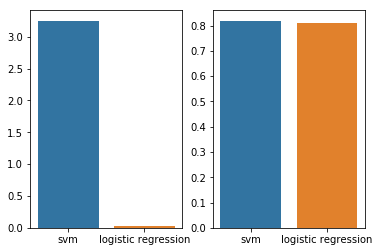

In [146]:
ncols = 2
nrows = math.ceil(len(models)/2)

chart, (ax1, ax2) = plt.subplots(nrows=nrows, ncols=ncols)
    
sns.barplot(models,training_times,ax=ax1)
sns.barplot(models,accuracies,ax=ax2);